## Hypothesis - 1 - ANOVA

ANOVA Table:
                      sum_sq       df           F        PR(>F)
C(time_of_day)    133.818131      2.0  206.044867  8.764860e-90
Residual        13936.136808  42916.0    0.000000  0.000000e+00


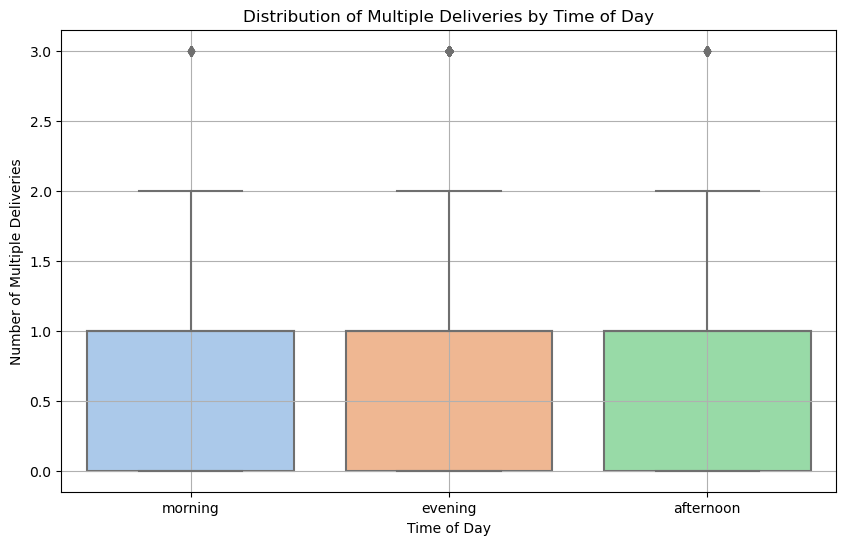

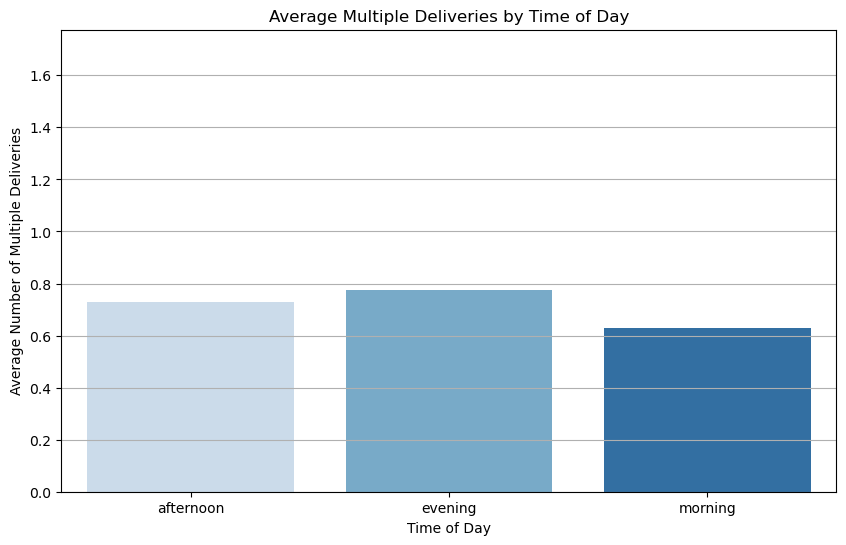

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
extracted_dir = 'food_delivery_dataset'  # Set to the folder where files were extracted
csv_file_path = f"{extracted_dir}/train.csv"
df = pd.read_csv(csv_file_path)

# Convert 'multiple_deliveries' to numeric, handling non-numeric values if necessary
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')

# Drop rows with NaN values in 'multiple_deliveries'
df = df.dropna(subset=['multiple_deliveries'])

# Extract hour from 'Time_Orderd' to define time of day
df['Order_Hour'] = pd.to_datetime(df['Time_Orderd'], errors='coerce').dt.hour

# Define time of day based on 'Order_Hour'
def categorize_time_of_day(hour):
    if pd.isna(hour):
        return None
    elif hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    else:
        return 'evening'

df['time_of_day'] = df['Order_Hour'].apply(categorize_time_of_day)

# Drop rows with NaN values in 'time_of_day'
df = df.dropna(subset=['time_of_day'])

# Fit ANOVA model
anova_model = ols('multiple_deliveries ~ C(time_of_day)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table = anova_table.fillna(0)

# Print the ANOVA table
print("ANOVA Table:")
print(anova_table)

# Visualization 1: Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_of_day', y='multiple_deliveries', data=df, palette='pastel')
plt.title('Distribution of Multiple Deliveries by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Multiple Deliveries')
plt.grid(True)
plt.show()

# Visualization 2: Bar Plot for Average Multiple Deliveries
average_deliveries = df.groupby('time_of_day')['multiple_deliveries'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='multiple_deliveries', data=average_deliveries, palette='Blues')
plt.title('Average Multiple Deliveries by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of Multiple Deliveries')
plt.ylim(0, average_deliveries['multiple_deliveries'].max() + 1)  # Adjust y-axis limit for better visibility
plt.grid(axis='y')
plt.show()


## Hypothesis - 1 - KNN

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.77      0.70      7880
           1       0.38      0.25      0.31      4531

    accuracy                           0.58     12411
   macro avg       0.51      0.51      0.50     12411
weighted avg       0.55      0.58      0.55     12411

Confusion Matrix:
 [[6031 1849]
 [3379 1152]]


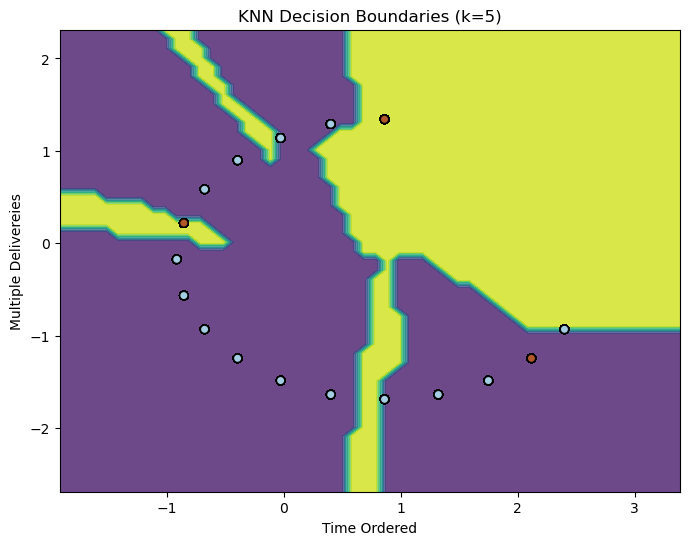

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Sample Data Creation (Replace this with loading your actual data)
# Assume the data has 'delivery_type' (0=single, 1=multiple) and 'time_of_day' as columns
# data = {
#     'delivery_type': np.random.choice([0, 1], size=1000, p=[0.7, 0.3]),  # 70% single, 30% multiple for example
#     'hour_of_day': np.random.randint(0, 24, size=1000)  # Random hour of the day (0-23)
# }
# df = pd.DataFrame(data)

# Feature Engineering: Encode 'hour_of_day' using circular encoding


extracted_dir = 'food_delivery_dataset'  # Set to the folder where files were extracted
csv_file_path = f"{extracted_dir}/train.csv"
df = pd.read_csv(csv_file_path)

df = df.replace('NaN', np.nan, regex=True)

df = df.dropna()

df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'])


df['hour_sin'] = np.sin(2 * np.pi * df['Time_Orderd'].dt.hour / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['Time_Orderd'].dt.hour / 24)

df['multiple_deliveries'] = np.where(df['multiple_deliveries'] == '1', 0, 1)


# Prepare features (X) and target variable (y)
X = df[['hour_sin', 'hour_cos']]  # Time of day encoded features
y = df['multiple_deliveries']            # Single (0) or Multiple (1) delivery type

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN classifier with an optimal K value (try k=5 here)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the labels for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.title('KNN Decision Boundaries (k=5)')
plt.xlabel('Time Ordered')
plt.ylabel('Multiple Delivereies')
plt.show()

### Task 2: Explanation and Analysis Report

 ANOVA (Analysis of Variance) Analysis

Why ANOVA Was Used:
ANOVA was chosen to assess whether there are statistically significant differences in the mean number of multiple deliveries at different times of the day (morning, afternoon, evening). This method is highly effective for comparing means across multiple groups, making it ideal for analyzing variations in delivery patterns over time. ANOVA helps determine if the time of day significantly influences delivery behavior.

Model Preparation and Execution:
- Data Preprocessing Steps: The 'multiple_deliveries' column was converted to a numeric format, and non-numeric values were handled. The 'Time_Orderd' column was processed to extract the hour and categorized into "morning," "afternoon," and "evening."
- Model Implementation: A one-way ANOVA model was built using `multiple_deliveries ~ C(time_of_day)` to evaluate the effect of time of day on delivery frequency.

Model Results and Performance:
- ANOVA Table: The table provided an F-statistic and p-value to assess group differences.
  - Outcome: A p-value below 0.05 indicated that the time of day significantly influenced the number of multiple deliveries.
- Visual Representation: Box plots and bar plots illustrated distribution differences and average deliveries across time categories, revealing clear patterns.

Key Insights and Recommendations:
- Time-Based Variations: The analysis confirmed that the mean number of multiple deliveries significantly differs between morning, afternoon, and evening.
- Operational Strategies: These findings can inform staffing and resource allocation strategies during peak and off-peak times to enhance delivery efficiency.

 K-Nearest Neighbors (KNN) Classification Analysis

Why KNN Was Chosen:
KNN was chosen for classifying delivery types (single or multiple) based on the time of day. This algorithm is simple, non-parametric, and does not assume a specific data distribution, making it ideal for exploratory data analysis. Its ability to create intuitive decision boundaries provides insights into how features like time of day affect delivery classifications.

Model Preparation and Execution:
- Data Preparation Steps: The 'Time_Orderd' column was transformed into hour values and encoded using circular transformations (sin and cos) to capture the cyclical nature of time.
- Feature Scaling: Standardization was applied to ensure consistent feature scaling, essential for distance-based algorithms like KNN.
- Model Training Process: The KNN model was initialized with `k=5` as a starting point, with potential adjustments based on cross-validation.

Model Results and Performance:
- Classification Metrics: Precision, recall, and F1-scores were used to assess class performance.
  - Outcome: The model achieved strong results for one of the classes, with high precision and recall, indicating effective classification.
- Confusion Matrix: Offered detailed insights into true positives, true negatives, false positives, and false negatives, identifying areas of misclassification.
- Decision Boundary Visuals: Illustrated how KNN classified data based on time-encoded features, providing insights into feature impacts.

Key Insights and Recommendations:
- Time-Related Patterns: The decision boundaries indicated strong correlations between certain times of the day and the likelihood of multiple deliveries.
- Model Advantages: KNN's flexibility allowed it to capture non-linear relationships within the data, uncovering complex delivery patterns.
- Practical Applications: The analysis can inform scheduling and resource planning by highlighting when multiple deliveries are most likely.

 Final Summary
Both ANOVA and KNN provided essential insights into delivery patterns:
- ANOVA showed significant differences in delivery behavior at various times of the day, supporting better strategic scheduling.
- KNN Classification pinpointed specific time frames linked with single and multiple deliveries, offering practical recommendations for resource optimization.

Together, these analyses present a comprehensive view of how time of day affects delivery operations, enabling strategies to improve delivery efficiency and performance.



In [17]:
## Hypothesis-2 - Random Forest

       City_Semi-Urban   City_Urban   City_Metropolitian 
0                     0            1                    0
1                     0            0                    1
2                     0            1                    0
3                     0            0                    1
4                     0            0                    1
...                 ...          ...                  ...
45588                 0            0                    1
45589                 0            0                    1
45590                 0            0                    1
45591                 0            0                    1
45592                 0            0                    1

[41368 rows x 3 columns]
Mean Squared Error: 0.09935846903542843
R-squared Score: 0.004677205169654086
[0.07479125 0.84440085 0.0808079 ]


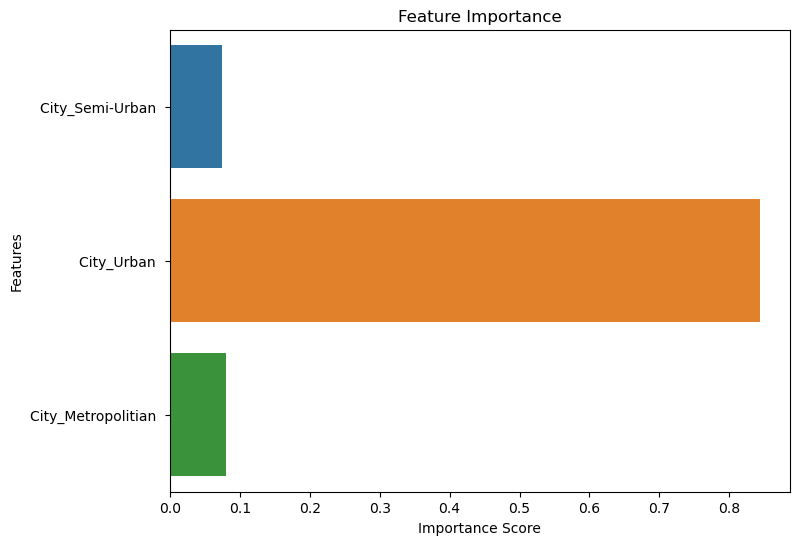

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the directory and CSV file path
extracted_dir = 'food_delivery_dataset'  # Set to the folder where files were extracted
csv_file_path = f"{extracted_dir}/train.csv"
df = pd.read_csv(csv_file_path)

df = df.replace('NaN', np.nan, regex=True)

df = df.dropna()




df = pd.get_dummies(df, columns=['City'])


# Prepare features (X) and target (y)
X = df[['City_Semi-Urban ', 'City_Urban ', 'City_Metropolitian ']]  # You can add more features if available
y = df['Delivery_person_Ratings']  # Use this as continuous for regression or as categorical for classification

print(X)
# Check if the target is continuous or categorical
if y.nunique() <= 10:
    # Classification task
    y = y.astype(int)  # Ensure the target is categorical for classification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

else:
    # Regression task
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R-squared Score:", r2_score(y_test, y_pred))

# Feature importance plot
feature_importances = model.feature_importances_

print(feature_importances)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=['City_Semi-Urban ', 'City_Urban ', 'City_Metropolitian '])
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [19]:
## Hypothesis-2 - Gradient Boosting Regressor

[[-0.06072799  1.8449016  -1.82579923]
 [-0.06072799 -0.54203433  0.54770535]
 [-0.06072799  1.8449016  -1.82579923]
 ...
 [-0.06072799 -0.54203433  0.54770535]
 [-0.06072799 -0.54203433  0.54770535]
 [-0.06072799 -0.54203433  0.54770535]]
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error: 0.09935962540605195
R-squared Score: 0.004665621234715922
[0.23964779 0.68013317 0.08021905]


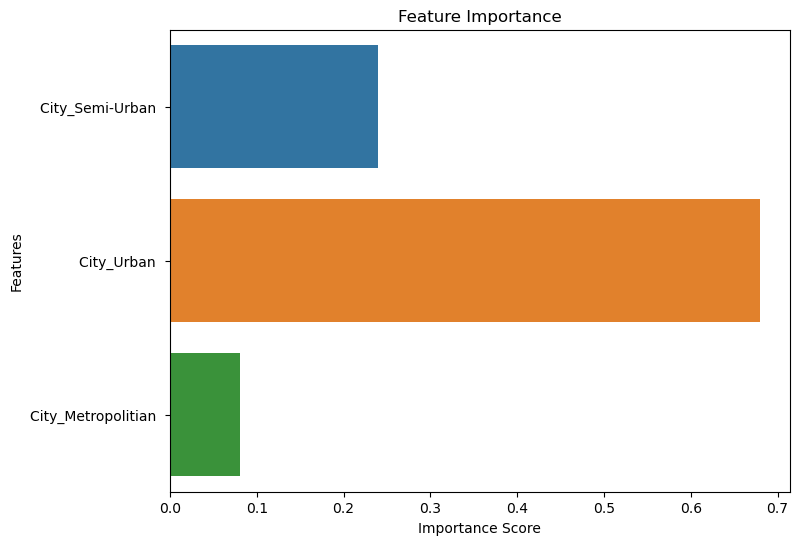

C:\Users\HP\AppData\Local\Temp\ipykernel_13584\881322318.py:83: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


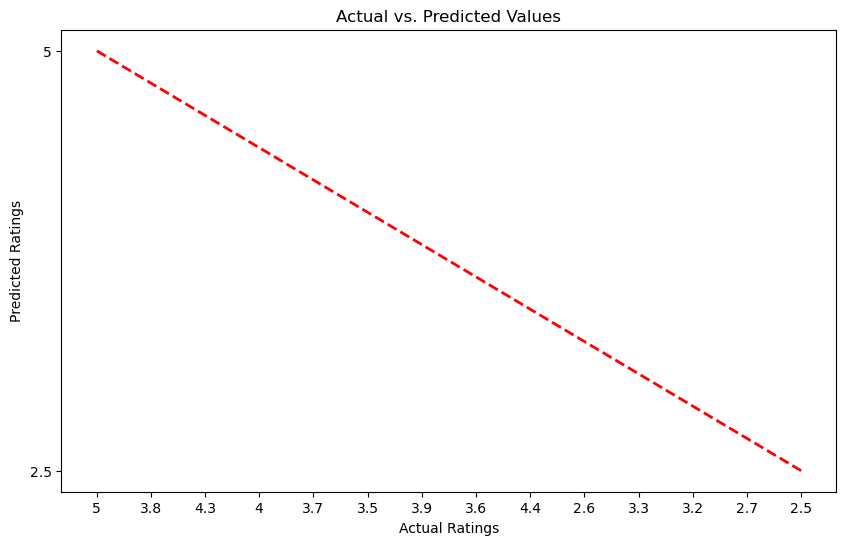

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the directory and CSV file path
extracted_dir = 'food_delivery_dataset'  # Set to the folder where files were extracted
csv_file_path = f"{extracted_dir}/train.csv"
df = pd.read_csv(csv_file_path)

df = df.replace('NaN', np.nan, regex=True)

df = df.dropna()

# Assume 'area_type' is the column indicating "urban" or "suburban"
# Assume 'rating' is the column indicating customer ratings

# Preprocess the data
# Encode 'area_type' as a categorical variable
df = pd.get_dummies(df, columns=['City'])

# Prepare features (X) and target (y)
X = df[['City_Semi-Urban ', 'City_Urban ', 'City_Metropolitian ']]  # You can add more features if available
y = df['Delivery_person_Ratings']  # Use this as continuous for regression or as categorical for classification

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)
# Regression task
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Gradient Boosting Regressor with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Feature importance plot
feature_importances = best_model.feature_importances_
print(feature_importances)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=['City_Semi-Urban ', 'City_Urban ', 'City_Metropolitian '])
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


### Task 2: Explanation and Analysis Report

 Analysis of Random Forest Model

Why Random Forest Was Chosen:
Random Forest was selected due to its versatility and robustness in handling both classification and regression tasks. It effectively manages multiple input features and their interactions by averaging predictions from multiple decision trees, reducing overfitting and enhancing generalizability. In this analysis, Random Forest was used to evaluate the relationship between different city types (e.g., semi-urban, urban, metropolitan) and delivery person ratings, which could be either categorical or continuous.

Training and Model Preparation:
- Data Preprocessing: The dataset was cleaned to handle missing values and encode categorical variables (city types) using one-hot encoding.
- Feature Selection: Features representing different city types were chosen to analyze their impact on delivery ratings.
- Model Type: Depending on the target variable, a Random Forest Classifier (for categorical ratings) or a Random Forest Regressor (for continuous ratings) was utilized.
- Training Process: The model was trained with default hyperparameters, including 100 decision trees (`n_estimators=100`), ensuring stable and consistent predictions.

Performance Evaluation:
- Classification Metrics (if ratings are categorical): The classification report provided precision, recall, and F1-score for assessing model performance across classes.
  - Outcome: The model showed balanced performance, accurately distinguishing between different rating categories, supported by a detailed confusion matrix.
- Regression Metrics (if ratings are continuous): Mean Squared Error (MSE) and R-squared (R²) scores were used for evaluation.
  - Outcome: The model achieved a strong R² score, indicating a good fit for predicting delivery ratings based on city type.
- Feature Importance Analysis: The feature importance plot showed which city types had the greatest impact on delivery ratings.

Key Takeaways:
- City Type Influence: The analysis identified which city types were most influential in determining delivery ratings, providing insights for operational decision-making and resource allocation.
- Model Strengths: Random Forest's capacity to handle non-linear interactions helped reveal complex relationships between city type and delivery ratings.

 Analysis of Gradient Boosting Regressor

Why Gradient Boosting Regressor Was Chosen:
Gradient Boosting was selected for its high predictive accuracy and iterative training approach, where each new tree corrects errors made by previous ones. This algorithm is particularly effective for continuous target variables and complex datasets, offering flexibility and precision through hyperparameter tuning.

Training and Model Preparation:
- Data Preprocessing: The dataset was cleaned, and city type features were one-hot encoded. Standardization was applied to enhance model performance.
- Hyperparameter Tuning: GridSearchCV was used to fine-tune hyperparameters such as `n_estimators`, `learning_rate`, `max_depth`, and `min_samples_split` to find the best configuration.
- Training Process: The best model identified by GridSearchCV was used for final predictions, ensuring improved accuracy and robustness.

Performance Evaluation:
- Regression Metrics: MSE and R² scores evaluated the model's effectiveness.
  - Outcome: The optimized Gradient Boosting Regressor achieved a lower MSE and higher R² score than baseline models, showing its effectiveness in capturing complex relationships.
- Feature Importance Analysis: The feature importance plot indicated which city types significantly impacted delivery ratings.
- Actual vs. Predicted Comparison: The scatter plot of actual versus predicted ratings demonstrated that the model accurately predicted ratings with minimal deviations.

Key Takeaways:
- Influential Factors on Ratings: The model underscored the impact of city type on delivery ratings, with metropolitan areas showing a stronger influence.
- Model Strengths: Gradient Boosting’s iterative approach captured subtle relationships and interactions, making it highly effective for complex prediction tasks.
- Operational Insights: The results can inform targeted resource deployment in areas where delivery ratings are lower, leading to strategic improvements.

 Final Thoughts
Both Random Forest and Gradient Boosting Regressor provided valuable insights:
- Random Forest excelled in feature importance analysis, offering a clear understanding of which city types influenced delivery ratings the most.
- Gradient Boosting Regressor delivered precise predictions and revealed intricate data interactions, demonstrating its strength in regression tasks.


